<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

Wed May 21 19:45:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.6.0+cu124


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

### 3 areas: Transportation, healthcare, retail

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

### Overfitting in machine learning mean when a model is learning too well, capturing noise and details that do not generalize to new data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

### **Way to fix and the cause**


## Cause:
* High variance and low bias
* The model is too complex
* THe size of training data is insufficient.


## Fix:
* Improve training data: Use `70%` on looking in training data and `30%` on making a model. Focus more on meaningful patterns and reduce noise
* Increase the training data: Machine learning is about reuse the best model before and improved.
* Dropout: IDK have to google more about this one.


## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
from torch import nn

# Import torch vision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
# Import mathplotlib for visualization
import matplotlib.pyplot as plt

In [5]:
# Set up training and testing datasets
train_data = datasets.MNIST(
    root="data", # Where the data download to
    train=True, # Get trainig data
    download=True, # download data if it doesnt exist yet
    transform=ToTensor(), # image come as PIL format, we need it in tensor format
    target_transform=None # you can transform labels
)

test_data = datasets.MNIST(
    root="data", # Where the data download to
    train=False, # Get trainig data
    download=True, # download data if it doesnt exist yet
    transform=ToTensor(), # image come as PIL format, we need it in tensor format
)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.13MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 135kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.28MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.31MB/s]


In [6]:
class_name = train_data.classes
class_name

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

## 6. Visualize at least 5 different samples of the MNIST training dataset.

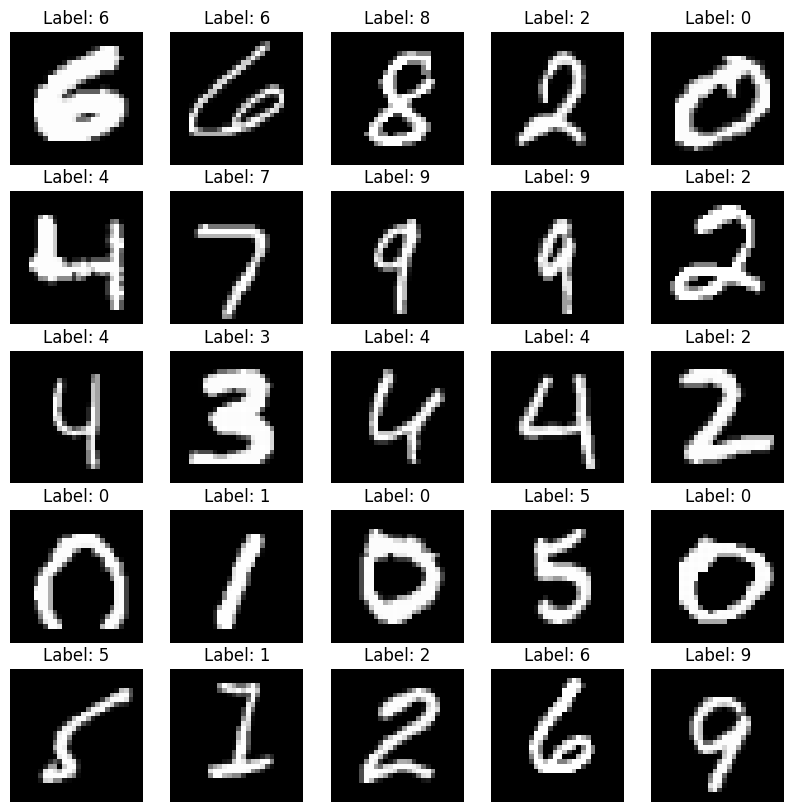

In [8]:
image, lable = train_data[0]
torch.manual_seed(42)
fig = plt.figure(figsize=(10, 10))
rows, cols = 5, 5
for i in range(1, rows * cols + 1):
  sameple_idx = torch.randint(len(train_data), size=[1]).item()
  img, label = train_data[sameple_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Label: {label}")
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [9]:
from torch.utils.data import DataLoader

# Setup the batch size hypperparameters
BATCH_SIZE = 32

# Tuurn dataset into batches

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b9e61a5f550>,
 <torch.utils.data.dataloader.DataLoader at 0x7b9e617cd810>)

In [10]:
#Check what is inside dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [11]:
# Model that using CNN (convolution neural network)

class MNISTModelV1(nn.Module):
  """ This model isa replicates TinyVGG architecture
  that was being done in notebook 03"""
  def __init__(self,
               input_shape=int,
               hidden_unit=int,
               output_shape=int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_unit*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x


In [12]:
torch.manual_seed(42)
model_1 = MNISTModelV1(input_shape=1,
                       hidden_unit=10,
                       output_shape=len(class_name)).to(device)
model_1

MNISTModelV1(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

# 8.5 Setup a loss function and optimizer for model

In [13]:
import requests
from pathlib import Path

# Download helper function from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [14]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [15]:
# Import timeit library
import timeit
from tqdm.auto import tqdm
from torch.utils.data import DataLoader

In [16]:
# Function to train model
def train_step(model :torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device):
  # Put model in train mode
  model.train()

  # Setup train loss and accuracy values
  train_loss, train_acc = 0, 0

  # Add a lopp throught training batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)
    # 1 forward pass
    y_pred = model(X)

    # 2 Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))
    # 3. Optimizer zero grads
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Divide total train loss and acc by lengtth of data loader
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")
  return train_loss, train_acc

In [17]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  model_1.eval()
  with torch.inference_mode():
    test_loss, test_acc = 0, 0
    for X, y in test_dataloader:
      X, y = X.to(device), y.to(device)
      # 1. Forward pass
      test_pred = model_1(X)
      # 2. Calculate loss
      test_loss += loss_fn(test_pred, y)
      # 3. caculator the accuracy
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))
    # Divide total train loss by length of train dataload
    test_loss /= len(dataloader)
    # Divide total test acc by lrngth of train dataload
    test_acc /= len(dataloader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")
    return test_loss, test_acc

In [18]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
stat_time = timer()

# Train and test the model
epochs = 5

for epochs in tqdm(range(epochs)):
  print(f"Epoch: {epochs}\n---------")
  train_step(model=model_1,
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            dataloader=test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

end_time = timer()

total_train_time = end_time - stat_time
print(f"Total training time on {device} : {total_train_time:.3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.32014 | Train acc: 89.27%
Test loss: 0.07883 | Test acc: 97.55%
Epoch: 1
---------
Train loss: 0.08281 | Train acc: 97.43%
Test loss: 0.06505 | Test acc: 97.84%
Epoch: 2
---------
Train loss: 0.06436 | Train acc: 98.00%
Test loss: 0.06132 | Test acc: 97.93%
Epoch: 3
---------
Train loss: 0.05606 | Train acc: 98.25%
Test loss: 0.05117 | Test acc: 98.31%
Epoch: 4
---------
Train loss: 0.04894 | Train acc: 98.44%
Test loss: 0.04399 | Test acc: 98.33%
Total training time on cuda : 62.003 seconds


In [19]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
stat_time = timer()

# Train and test the model
epochs = 5
model_1_cpu = model_1.to("cpu")
for epochs in tqdm(range(epochs)):
  print(f"Epoch: {epochs}\n---------")
  train_step(model=model_1_cpu,
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device="cpu")
  test_step(model=model_1_cpu,
            dataloader=test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn=accuracy_fn,
            device="cpu")

end_time = timer()

total_train_time = end_time - stat_time
print(f"Total training time on {device} : {total_train_time:.3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.04441 | Train acc: 98.58%
Test loss: 0.04663 | Test acc: 98.42%
Epoch: 1
---------
Train loss: 0.04045 | Train acc: 98.74%
Test loss: 0.04928 | Test acc: 98.49%
Epoch: 2
---------
Train loss: 0.03727 | Train acc: 98.83%
Test loss: 0.05035 | Test acc: 98.51%
Epoch: 3
---------
Train loss: 0.03530 | Train acc: 98.89%
Test loss: 0.03784 | Test acc: 98.73%
Epoch: 4
---------
Train loss: 0.03261 | Train acc: 98.92%
Test loss: 0.03803 | Test acc: 98.63%
Total training time on cuda : 179.226 seconds


***### 9.1 It took longer to train on CPu than GPU but the CPU train at the first epoch is more accurarcy than GPU. My guess is CPU took longer to train so it look more into the picture than the GPU.***

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [20]:
# Function to make prediction

def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_prob = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      image, label = sample # Unpack the tuple to get the image and label
      image = torch.unsqueeze(image, dim=0) # Unsqueeze the image tensor
      image = image.to(device)
      # Forward pass
      pred_logit = model(image) # Pass the image tensor to the model
      # Get predicition probabilities
      pred_prob.append(torch.softmax(pred_logit.squeeze(), dim=0))
  return torch.stack(pred_prob)

In [21]:
# Make prediciton
pred_prob = make_predictions(model=model_1,
                            data=test_data,)
pred_prob[:5]

tensor([[9.3516e-13, 1.4762e-10, 1.5484e-07, 2.0099e-06, 1.5834e-12, 9.4874e-12,
         1.1869e-19, 1.0000e+00, 7.8006e-10, 3.4716e-09],
        [2.0292e-06, 1.0458e-05, 9.9999e-01, 1.3119e-09, 2.7361e-10, 5.5191e-12,
         2.0058e-06, 8.6988e-09, 3.4147e-07, 1.8137e-12],
        [7.8352e-08, 9.9941e-01, 1.9477e-07, 2.0729e-07, 5.5976e-04, 4.9461e-07,
         1.1072e-05, 1.6015e-05, 2.3241e-06, 9.0788e-08],
        [9.9979e-01, 2.6642e-11, 1.3260e-08, 2.5280e-10, 4.8731e-10, 7.1623e-06,
         2.0646e-04, 5.0853e-11, 4.8294e-07, 1.6889e-07],
        [2.2736e-10, 1.2075e-10, 3.0398e-09, 5.6280e-10, 1.0000e+00, 2.8228e-11,
         6.1509e-09, 9.3180e-08, 6.0581e-08, 2.5975e-06]], device='cuda:0')

In [22]:
# Convert to target label
pred_labels = torch.argmax(pred_prob, dim=1)
pred_labels[:5]

tensor([7, 2, 1, 0, 4], device='cuda:0')

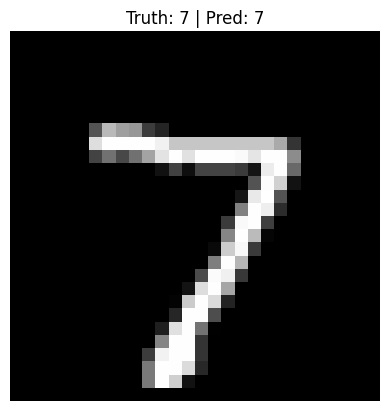

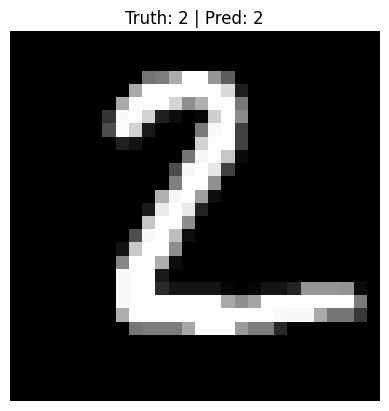

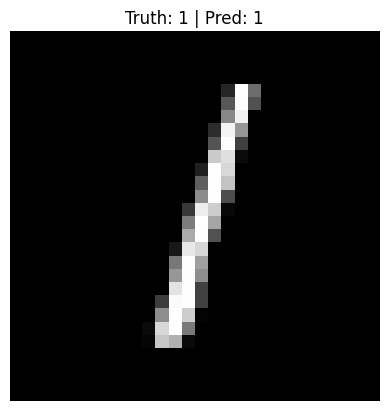

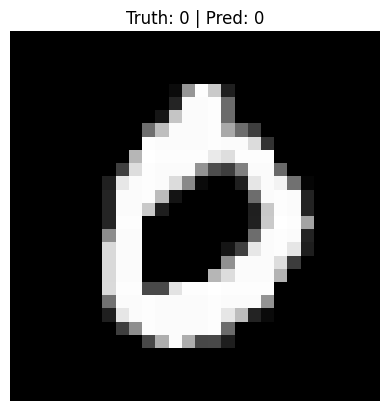

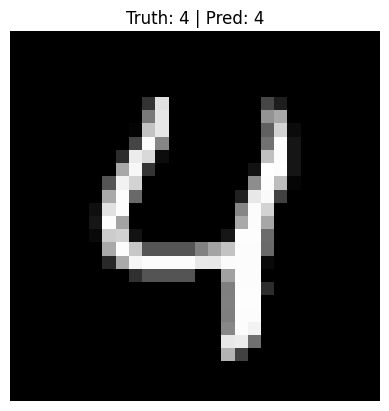

In [23]:
num_to_plot = 5
for i in range(num_to_plot):
  # Get image and labels from the test data
  img = test_data[i][0]
  label = test_data[i][1]

  # Make prediction on image
  model_pred_logits = model_1(img.unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  # Plot the image and prediction
  plt.figure()
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [24]:
# Check for mlxtend version
import mlxtend
mlxtend.__version__

'0.23.4'

In [25]:

y_pred =  []
model_1.eval()
with torch.inference_mode():
  for X, y in test_dataloader:
    X, y = X.to(device), y.to(device)
    y_logit = model_1(X)
    y_preds = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    y_pred.append(y_preds)
y_pred_tensor = torch.cat(y_pred)
y_pred_tensor

tensor([7, 2, 1,  ..., 4, 5, 6], device='cuda:0')

In [ ]:
# See if required packages are installed and if not, install them

try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]>=19, "mlxextend should be 0.19.0 or higher")
except:
  !pip install torchmetrics
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

ValueError: ('The `preds` and `target` should have the same shape,', ' got `preds` with shape=torch.Size([16]) and `target` with shape=torch.Size([10000]).')

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [31]:
torch.manual_seed(42)
random_tensor = torch.rand(size=(1, 3, 64, 64))
print(f"Shape of tensor: {random_tensor.shape}")
# Create  pool layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# pass the random tesnor through max pool layer
output = max_pool_layer(random_tensor)
print(f"Shape of output: {output.shape}")

Shape of tensor: torch.Size([1, 3, 64, 64])
Shape of output: torch.Size([1, 3, 32, 32])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?